# Load historical data

The data is stored in a parquet file, which we assume has been extracted (see README.md in the directory!).

In [1]:
import pandas as pd

In [2]:
df = pd.read_parquet("CoinGecko_2013-04-28_2021-03-28.parquet")

In [3]:
df

01coin                                    \
              Market Cap        Volume      Open     Close   
Date                                                         
2013-04-28           NaN           NaN       NaN       NaN   
2013-04-29           NaN           NaN       NaN       NaN   
2013-04-30           NaN           NaN       NaN       NaN   
2013-05-01           NaN           NaN       NaN       NaN   
2013-05-02           NaN           NaN       NaN       NaN   
...                  ...           ...       ...       ...   
2021-03-24  44849.546418  17753.918394  0.004088  0.003836   
2021-03-25  41418.224947  16510.273243  0.003836  0.003811   
2021-03-26  42938.399002  15510.137909  0.003811  0.004109   
2021-03-27  43741.906641  13046.338640  0.004109  0.004207   
2021-03-28  44775.937139  17387.602007  0.004207       NaN   

           0-5x-long-algorand-token                    \
                         Market Cap Volume Open Close   
Date                                                    
2013-04-28                      NaN    NaN  NaN   NaN   
2013-04-29                      NaN    NaN  NaN   NaN   
2013-04-30                      NaN    NaN  NaN   NaN   
2013-05-01                      NaN    NaN  NaN   NaN   
2013-05-02                      NaN    NaN  NaN   NaN   
...                             ...    ...  ...   ...   
2021-03-24                      NaN    NaN  NaN   NaN   
2021-03-25                      NaN    NaN  NaN   NaN   
2021-03-26                      NaN    NaN  NaN   NaN   
2021-03-27                      NaN    NaN  NaN   NaN   
2021-03-28                      NaN    NaN  NaN   NaN   

           0-5x-long-altcoin-index-token              ...       zyx            \
                              Market Cap      Volume  ...      Open     Close   
Date                                                  ...                       
2013-04-28                           NaN         NaN  ...       NaN       NaN   
2013-04-29                           NaN         NaN  ...       NaN       NaN   
2013-04-30                           NaN         NaN  ...       NaN       NaN   
2013-05-01                           NaN         NaN  ...       NaN       NaN   
2013-05-02                           NaN         NaN  ...       NaN       NaN   
...                                  ...         ...  ...       ...       ...   
2021-03-24                           0.0    7.485906  ...  0.012754  0.012375   
2021-03-25                           0.0   33.036946  ...  0.012375  0.005582   
2021-03-26                           0.0   28.754051  ...  0.005582  0.011726   
2021-03-27                           0.0   15.806806  ...  0.011726  0.011503   
2021-03-28                           0.0  484.766212  ...  0.011503       NaN   

           zzz-finance                            zzz-finance-v2           \
            Market Cap Volume      Open     Close     Market Cap   Volume   
Date                                                                        
2013-04-28         NaN    NaN       NaN       NaN            NaN      NaN   
2013-04-29         NaN    NaN       NaN       NaN            NaN      NaN   
2013-04-30         NaN    NaN       NaN       NaN            NaN      NaN   
2013-05-01         NaN    NaN       NaN       NaN            NaN      NaN   
2013-05-02         NaN    NaN       NaN       NaN            NaN      NaN   
...                ...    ...       ...       ...            ...      ...   
2021-03-24     8002.19    0.0  0.686575  0.686575        52449.0   599.16   
2021-03-25     8002.19    0.0  0.686575  0.686575        54511.0   274.25   
2021-03-26     8002.19    0.0  0.686575  0.686575        55037.0  1055.59   
2021-03-27         NaN    NaN       NaN       NaN        58198.0    72.75   
2021-03-28     8002.19    0.0  0.686575       NaN        76848.0  5026.66   

                        
            Open Close  
Date                    
2013-04-28   NaN   NaN  
2013-04-29   NaN   NaN  
2013-04-30 

# Plots

Random plots just to see if everything's working.

In [4]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


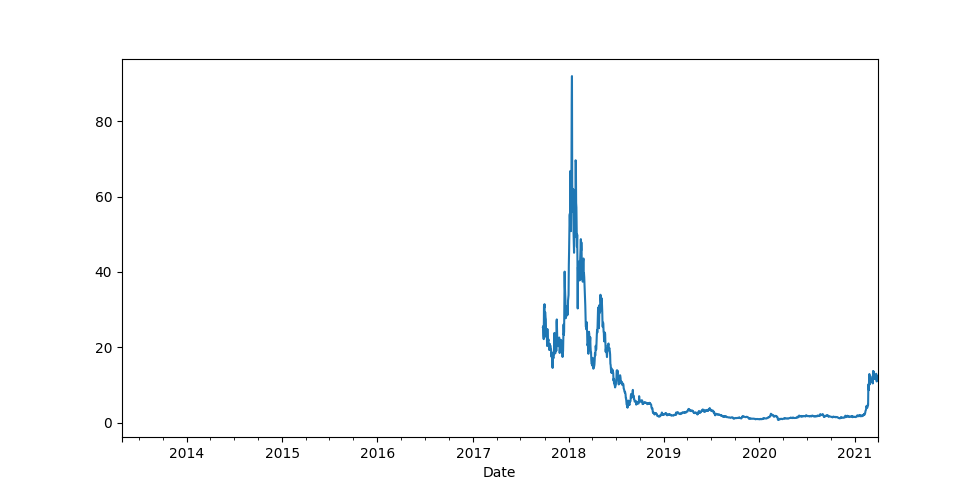

<AxesSubplot:xlabel='Date'>

In [7]:
fig = plt.figure(); df['gas']['Close'].plot(figure=fig)

<IPython.core.display.Javascript object>


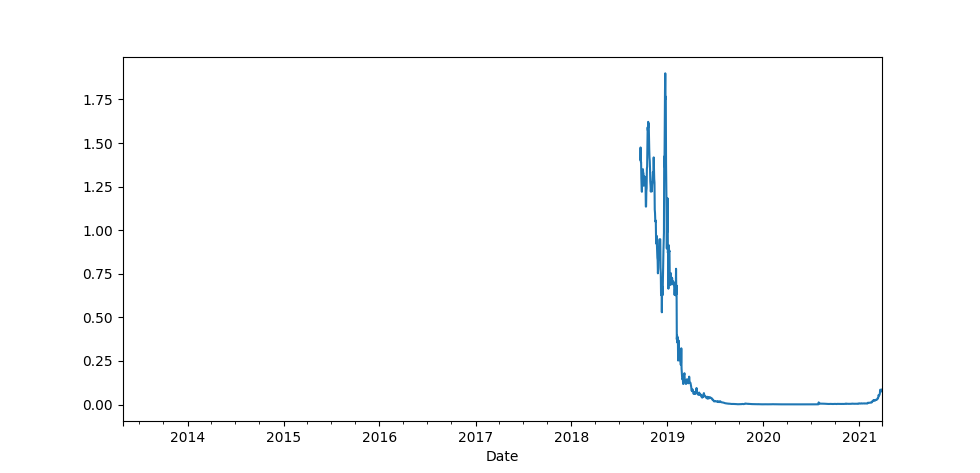

<AxesSubplot:xlabel='Date'>

In [8]:
fig = plt.figure(); df['spendcoin']['Close'].plot(figure=fig)

<IPython.core.display.Javascript object>


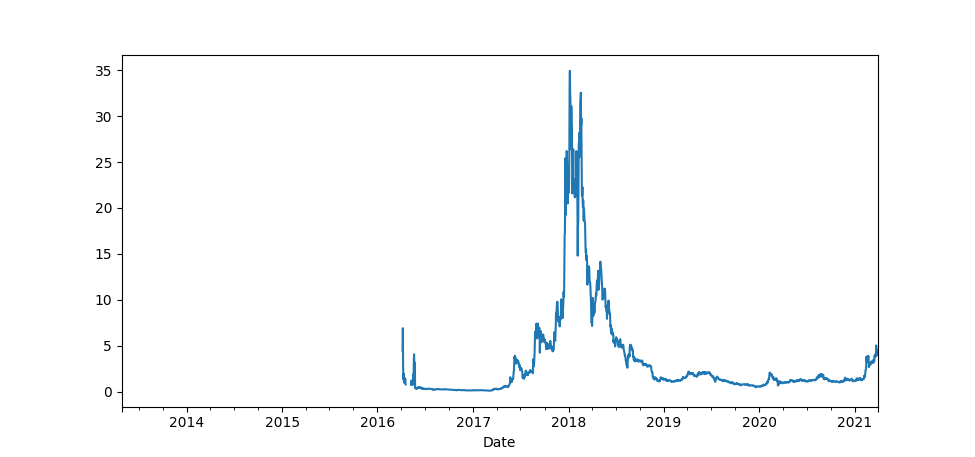

<AxesSubplot:xlabel='Date'>

In [9]:
fig = plt.figure(); df['lisk']['Close'].plot(figure=fig)

<IPython.core.display.Javascript object>


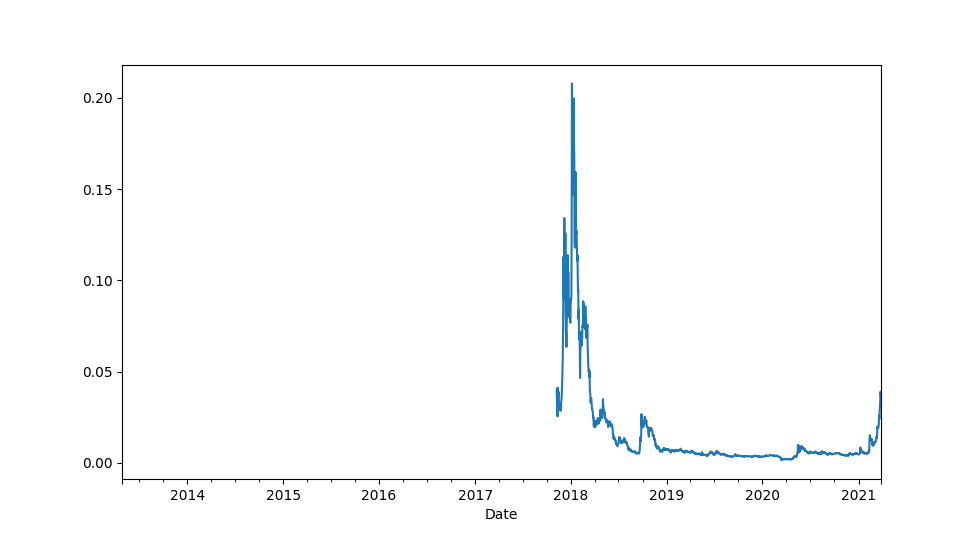

<AxesSubplot:xlabel='Date'>

In [10]:
fig = plt.figure(); df['electroneum']['Close'].plot(figure=fig)